# Lesson 4: Installing packages

In this lesson, you will learn how to install third-party packages using a command called `pip`.

Once you have installed a package, you can use functions from the package by importing them using the `import` command.

## Installing packages using `pip`

Run the cell below to install the `bs4` package:

In [1]:
!pip install bs4


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


**Note:** You can safely ignore any warnings you see about upgrading pip.

bs4 is short for **Beautiful Soup 4**. You can check out the [Beautiful Soup documentation](https://pypi.org/project/beautifulsoup4/) if you want to learn more about the package, but it gives you tools to interpret HTML webpages inside Python programs.

Now that you have installed the bs4 package, you can use it in your programs!

First, you need to import the `BeautifulSoup` function you'll use from the `bs4` package, as well as some other packages:

In [2]:
from bs4 import BeautifulSoup

import requests # let's you download webpages into python
from helper_functions import * 
from IPython.display import HTML, display

## Get data from the web

In this section, you'll "scrape", or download HTML data from a website, in this case from a [Batch newsletter](https://www.deeplearning.ai/the-batch/) published by DeepLearning.AI.

You'll use the `requests` Python package to download the data from the webpage and make it available in your program:

In [3]:
# The url from one of the Batch's newsletter
url = 'https://www.deeplearning.ai/the-batch/the-world-needs-more-intelligence/'

# Getting the content from the webpage's contents
response = requests.get(url)

# Print the response from the requests
print(response)

<Response [200]>


**Note:** The `<Response [200]>` you see is an indication from the requests library that your HTTP request was successful. You can ask the chatbot for details about other codes you might see.

Now that you have downloaded the content from the website, you can display it in the notebook using the following code:

In [4]:
HTML(f'<iframe src={url} width="60%" height="400"></iframe>')

/usr/local/lib/python3.9/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


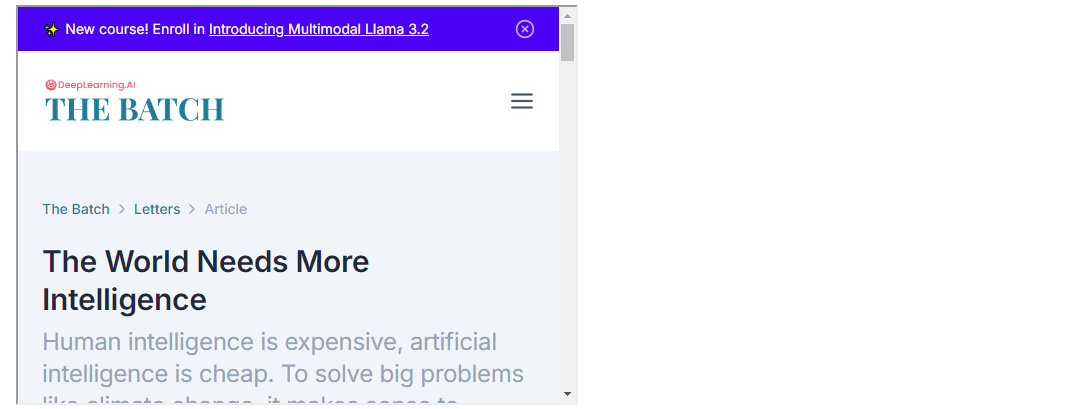

Next, you'll use Beautiful Soup to extract all the text paragraphs from the HTML structure that you retrieved, and save it as a single string. Here is the code to do this:

In [5]:
# Using beautifulsoup to extract the text
soup = BeautifulSoup(response.text, 'html.parser')
# Find all the text in paragraph elements on the webpage
all_text = soup.find_all('p')

# Create an empty string to store the extracted text
combined_text = ""

# Iterate over 'all_text' and add to the combined_text string
for text in all_text:
    combined_text = combined_text + "\n" + text.get_text()

# Print the final combined text
print(combined_text)


✨ New course! Enroll in  Introducing Multimodal Llama 3.2
Dear friends,
Last year, a number of large businesses and individuals went to the media and governments and pushed the message that AI is scary, impossible to control, and might even lead to human extinction. Unfortunately they succeeded: Now many people think AI is scary. But when I speak with regulators, media, and private citizens, I like to bring the issue of whether AI is beneficial or harmful back to a very basic question: Are we better off with more, or less, intelligence in the world? 
Intelligence is the ability to apply skills and knowledge to make good decisions. Yes, intelligence can be used for nefarious purposes. But over many centuries, a major driver of civilization's progress has been people getting smarter and more educated. Until now, human intelligence has been the primary form of intelligence available. But with artificial intelligence, we have the opportunity to bring much more intelligence into the world.

For more details about how this code works, you can ask the chatbot:

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>:
<br><br>
What is the following code doing?
<br><br>
soup = BeautifulSoup(response.text, 'html.parser')<br>
all_text = soup.find_all('p')
</p>

## Extracting information from scraped website data using LLMs

You can pass the text you just extracted from the Batch newsletter website to an LLM and ask it to extract the most relevant information for you.

Start by writing the prompt and passing in the text you extracted:

In [6]:
prompt = f"""Extract the key bullet points from the following text.

Text:
{combined_text}
"""

Then pass the prompt to the LLM:

In [7]:

print_llm_response(prompt)

- New course: "Introducing Multimodal Llama 3.2"
- AI perception: Many view AI as scary and uncontrollable due to media influence.
- Key question: Are we better off with more or less intelligence in the world?
- Intelligence defined as the ability to make good decisions using skills and knowledge.
- AI can make intelligence more accessible and affordable.
- AI's potential role in solving major societal issues, like climate change.
- Importance of discussing the benefits of AI to alleviate fears.
- Recent TED AI talk emphasizes excitement about AI and addresses misplaced anxieties.
- New short course on "Building Applications with Vector Databases" available.
- Course covers various applications of vector databases in AI.


## One more example of installing packages

Throughout the courses so far, you've imported helper functions from a file called `helper_functions.py` using commands like `from helper_functions import get_llm_response`.

The DeepLearning.AI team has created a third-party package called `aisetup` that you can use to access the helper functions from the course in your own code outside of this learning platform.

To install it, run the following command:

In [8]:
!pip install aisetup


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


Now the package is installed, you can import helper functions from it using the `import` command. For example, if you want to import `get_llm_response`, you now run this code:

In [9]:
from aisetup import get_llm_response

In [10]:
response = get_llm_response("Why is the programming language called Python?")

# Print LLMs response
print(response)

Python is named after the British comedy television show "Monty Python's Flying Circus," which its creator, Guido van Rossum, enjoyed. The name reflects the language's emphasis on fun and ease of use.


## Extra practice

Try the following exercises to test what you have learned. If you get stuck, as the chatbot for help!

### Exercise 1

Modify the following code to answer the following question:
- Who built the new short course mentioned in the letter?

In [11]:
# Modify the prompt
prompt = f"""
Who built the new short course mentioned in the letter?

Text:
{combined_text}
"""
print_llm_response(prompt)

The new short course is taught by Tim Tully from Pinecone.


### Exercise 2

Use the `celsius_to_fahrenheit` function in the `aisetup` package to calculate the Fahrenheit equivalent of 0 degrees Celsius.

You'll need to complete the import statement and the calculation.

In [12]:
# Complete the import statement
from aisetup import celsius_to_fahrenheit

# Complete the calculation
zero_celsius_in_fahrenheit = celsius_to_fahrenheit(0)
print(zero_celsius_in_fahrenheit)

0°C is equivalent to 32.00°F
None


### Challenge exercise!

Write code that uses the `bs4` package to create a string that contains the **title element from the Batch newsletter**. This is the text that starts "The World Needs More Intelligence".

**Hint 1:** Titles on webpages are often header elements, with tags like `<h1>` or `<h2>`.
**Hint 2:** Ask the chatbot for help, using the code you have already written as a starting point.

In [13]:
url

'https://www.deeplearning.ai/the-batch/the-world-needs-more-intelligence/'

In [16]:
# Using beautifulsoup to extract the text
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><title>The World Needs More Intelligence</title><meta content="Last year, a number of large businesses and individuals went to the media and governments and pushed the message that AI is scary, impossible to control..." name="description"/><link href="https://www.deeplearning.ai/the-batch/the-world-needs-more-intelligence/" rel="canonical"/><meta content="article" property="og:type"/><meta content="The World Needs More Intelligence" property="og:title"/><meta content="Last year, a number of large businesses and individuals went to the media and governments and pushed the message that AI is scary, impossible to control..." property="og:description"/><meta content="The World Needs More Intelligence" property="og:site_name"/><meta content="https://www.deeplearning.ai/the-batch/the-world-needs-more-intelligence/" property="og:url"/><meta content="2024-01-31T14:19:49.000-08:00" p

In [17]:
# Your code here

title = soup.find('title').text

print(title)

The World Needs More Intelligence
